In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
y_test.shape

(10000, 1)

In [15]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [13]:
classes = ['ariplane','automoblile','bird','cat','dear','dog','frog','horse','ship','truck']

In [16]:
classes[9]

'truck'

In [54]:
def plot_sample(x, y, index): 
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

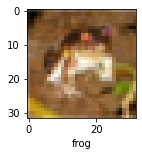

In [20]:
plot_sample(x_train, y_train, 0)

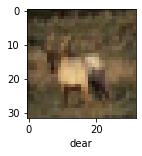

In [21]:
plot_sample(x_train, y_train, 3)

In [24]:
x_train = x_train/255
x_test = x_test/255

In [27]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 141s 90ms/step - loss: 1.8139 - accuracy: 0.3527
Epoch 2/5
1563/1563 [==============================] - 128s 82ms/step - loss: 1.6238 - accuracy: 0.4249
Epoch 3/5
1563/1563 [==============================] - 129s 83ms/step - loss: 1.5404 - accuracy: 0.4569
Epoch 4/5
1563/1563 [==============================] - 124s 79ms/step - loss: 1.4819 - accuracy: 0.4774
Epoch 5/5
1563/1563 [==============================] - 133s 85ms/step - loss: 1.4327 - accuracy: 0.4951


In [33]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 10s 32ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.47      0.51      1000
           1       0.64      0.56      0.60      1000
           2       0.43      0.17      0.25      1000
           3       0.43      0.19      0.26      1000
           4       0.33      0.59      0.42      1000
           5       0.40      0.40      0.40      1000
           6       0.43      0.67      0.53      1000
           7       0.68      0.41      0.51      1000
           8       0.46      0.76      0.57      1000
           9       0.59      0.48      0.53      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.46     10000
weighted avg       0.49      0.47      0.46     10000



In [35]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [36]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 76s 48ms/step - loss: 1.4586 - accuracy: 0.4742
Epoch 2/10
1563/1563 [==============================] - 79s 51ms/step - loss: 1.0970 - accuracy: 0.6160
Epoch 3/10
1563/1563 [==============================] - 98s 63ms/step - loss: 0.9551 - accuracy: 0.6652
Epoch 4/10
1563/1563 [==============================] - 76s 48ms/step - loss: 0.8679 - accuracy: 0.6977
Epoch 5/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.7931 - accuracy: 0.7231
Epoch 6/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.7346 - accuracy: 0.7440
Epoch 7/10
1563/1563 [==============================] - 74s 48ms/step - loss: 0.6869 - accuracy: 0.7600
Epoch 8/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.6390 - accuracy: 0.7762
Epoch 9/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.5950 - accuracy: 0.7927
Epoch 10/10
1563/1563 [==============================] - 76s 49m

In [39]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 5s 14ms/step - loss: 0.9427 - accuracy: 0.6953


[0.9427365064620972, 0.6952999830245972]

In [41]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 5s 15ms/step


array([[2.9626874e-06, 5.4675133e-06, 6.2403968e-04, 8.9570814e-01,
        1.0812980e-04, 9.3789563e-02, 9.6582947e-03, 2.7752915e-06,
        9.5561823e-05, 4.9853161e-06],
       [1.0953135e-02, 4.9065518e-01, 2.0319630e-06, 1.2687598e-06,
        1.9498410e-07, 3.1991757e-08, 1.7240195e-06, 1.8205975e-08,
        4.9820060e-01, 1.8592035e-04],
       [1.4897273e-01, 5.7597029e-01, 5.8519194e-04, 6.6501084e-03,
        2.9520570e-05, 2.1141015e-04, 7.8305056e-05, 1.3970773e-03,
        2.6124224e-01, 4.8631248e-03],
       [9.1775066e-01, 3.4921844e-03, 5.3904923e-03, 1.5033578e-03,
        1.0159173e-04, 1.2075286e-06, 1.2870107e-04, 3.9879219e-06,
        7.1625613e-02, 2.1123315e-06],
       [1.4310730e-08, 1.6332763e-07, 1.4231238e-01, 3.6445294e-02,
        1.1447439e-01, 1.1880941e-04, 7.0664859e-01, 7.9635107e-09,
        2.9759764e-07, 1.2301046e-08]], dtype=float32)

In [42]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

In [43]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

TypeError: ignored

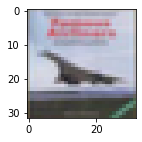

In [55]:
plot_sample(x_test, y_test, 3)

In [51]:
classes[y_classes[3]]

'ariplane'

In [53]:
classes[y_classes[4]]

'frog'